In [1]:
!pip install pandas 
!pip install numpy 
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('advertising_ef.csv')

In [4]:
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [5]:
df.isnull().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [7]:
df.shape

(1009, 10)

In [8]:
df['Daily Time Spent on Site']=df['Daily Time Spent on Site'].fillna(np.mean(df['Daily Time Spent on Site']))

In [9]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [10]:
df['Area Income']=df['Area Income'].fillna(np.mean(df['Area Income']))

In [11]:
df['Daily Internet Usage']= df['Daily Internet Usage'].fillna(np.mean(df['Daily Internet Usage']))

In [12]:
df.isnull().sum()

Daily Time Spent on Site     0
Age                          0
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [13]:
df['Timestamp'].iloc[10]

'16-03-2016 20:19'

In [14]:
df.dropna(inplace=True)

In [15]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable


In [16]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [17]:
pip install dpcpp-cpp-rt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
df2 = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [20]:
le = LabelEncoder()


In [21]:
df['City'] = le.fit_transform(df['City'])

In [22]:
df['Gender'] = le.fit_transform(df['Gender'])

In [23]:
df.drop('Country',axis=1,inplace=True)

In [24]:
df['Timestamp']=le.fit_transform(df['Timestamp'])

In [25]:
df['Ad Topic Line'] = le.fit_transform(df['Ad Topic Line'])

In [49]:
df.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Timestamp,Clicked on Ad
0,68.950000,35.0,61833.900000,256.09,90,944,0,856,0
1,65.009463,31.0,68441.850000,193.77,451,889,1,118,0
2,69.470000,26.0,59785.940000,236.50,552,112,0,400,0
3,74.150000,29.0,54806.180000,245.89,883,922,1,294,0
4,68.370000,35.0,73889.990000,225.58,750,793,0,92,0
6,88.910000,33.0,53852.850000,208.36,215,47,0,882,0
7,65.009463,48.0,24593.330000,131.76,707,660,1,203,1
8,74.530000,30.0,54958.573617,221.51,105,871,1,583,0
9,69.880000,20.0,55642.320000,183.82,441,701,1,358,0
10,47.640000,49.0,45632.510000,122.02,85,865,0,505,1


In [48]:
df2.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.950000,35.0,61833.900000,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,65.009463,31.0,68441.850000,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.470000,26.0,59785.940000,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.150000,29.0,54806.180000,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.370000,35.0,73889.990000,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
6,88.910000,33.0,53852.850000,208.36,Enhanced dedicated support,Brandonstad,Female,Myanmar,28-01-2016 20:59,0
7,65.009463,48.0,24593.330000,131.76,Reactive local challenge,Port Jefferybury,Male,Australia,07-03-2016 01:40,1
8,74.530000,30.0,54958.573617,221.51,Configurable coherent function,West Colin,Male,Grenada,18-04-2016 09:33,0
9,69.880000,20.0,55642.320000,183.82,Mandatory homogeneous architecture,Ramirezton,Male,Ghana,11-07-2016 01:42,0
10,47.640000,49.0,45632.510000,122.02,Centralized neutral neural-net,West Brandonton,Female,Qatar,16-03-2016 20:19,1


<Axes: >

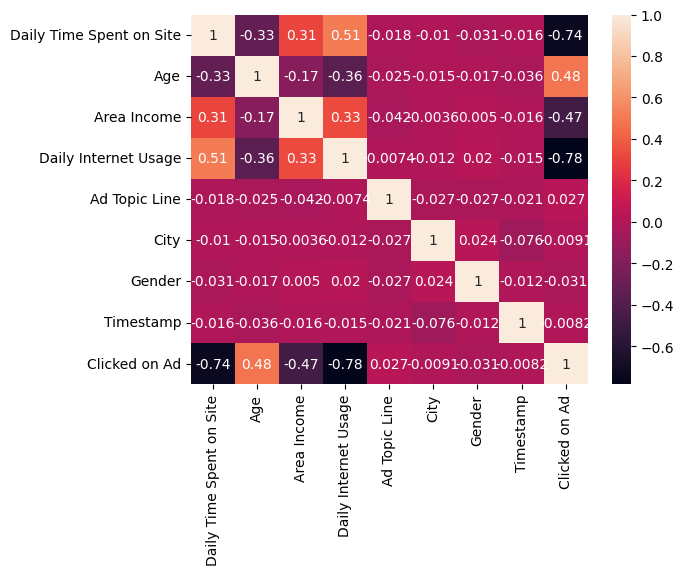

In [28]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [29]:
y = df['Clicked on Ad']

In [30]:
X = df.drop('Clicked on Ad', axis=1)

In [31]:
from sklearnex.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [34]:
dtree = DecisionTreeClassifier(criterion = 'gini',max_depth=4,min_samples_split=4,min_samples_leaf=3)

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=4)

In [36]:
pred = dtree.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
accuracy_score(y_test,pred)*100

90.87837837837837

In [39]:
confusion_matrix(y_test,pred)

array([[130,  14],
       [ 13, 139]])

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       144
           1       0.91      0.91      0.91       152

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



In [41]:
dtree.predict([df.iloc[254][:-1]])

/home/u115551/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [42]:
df.iloc[254]['Clicked on Ad']

1.0

In [43]:
X.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Timestamp'],
      dtype='object')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [45]:
lr =  LogisticRegression()
lr.fit(X_train,y_train)
pred2 = lr.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       144
           1       0.91      0.90      0.91       152

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



/home/u115551/.local/lib/python3.10/site-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
import pickle

In [47]:
with open('classifier.pkl','wb') as file:
    pickle.dump(dtree,file)


In [50]:
accuracy_score(y_test,pred2)

0.9054054054054054

In [55]:
pd.DataFrame(data = confusion_matrix(y_test,pred),index=[1,0],columns=[1,0])

,1,0
1,130,14
0,13,139
